# **01-Análisis descriptivo**

In [1]:
%cd ..

/Users/belensantamaria/Documents/TFM


In [2]:
import json
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from collections import Counter

In [3]:
nlp = spacy.load("es_core_news_sm")

## **1. Análisis de los campos**

In [4]:
file_path = "data/raw/clinais.dev.json"

In [5]:
with open(file_path) as f:
    data = json.load(f)

In [6]:
data.keys()

dict_keys(['annotated_entries'])

In [7]:
len(data["annotated_entries"])

127

In [8]:
data["annotated_entries"]["S0004-06142005000200009-3"].keys()

dict_keys(['note_id', 'note_text', 'section_annotation', 'boundary_annotation'])

In [9]:
data["annotated_entries"]["S0004-06142005000200009-3"]["note_text"]

'Paciente de 69 a. de edad con un PSA en el momento de la consulta de 22 ng/ml. El paciente tenía una biopsia previa por sextantes negativa. Se practicó una E-RME que mostró inicialmente un nódulo situado en la base prostática del lóbulo izquierdo, morfológicamente sugestivo de hiperplasia nodular, pero el estudio espectroscópico mostró una alteración metabólica de este nódulo, con una importante elevación de la colina y una disminución del citrato, sugerente de neoplasia.\n \n'

In [10]:
data["annotated_entries"]["S0004-06142005000200009-3"]["section_annotation"]["gold"]

[{'segment': 'Paciente de 69 a. de edad ',
  'label': 'PRESENT_ILLNESS',
  'start_offset': 0,
  'end_offset': 26},
 {'segment': 'con un PSA en el momento de la consulta de 22 ng/ml. ',
  'label': 'EXPLORATION',
  'start_offset': 26,
  'end_offset': 79},
 {'segment': 'El paciente tenía una biopsia previa por sextantes negativa. ',
  'label': 'PAST_MEDICAL_HISTORY',
  'start_offset': 79,
  'end_offset': 140},
 {'segment': 'Se practicó una E-RME que mostró inicialmente un nódulo situado en la base prostática del lóbulo izquierdo, morfológicamente sugestivo de hiperplasia nodular, pero el estudio espectroscópico mostró una alteración metabólica de este nódulo, con una importante elevación de la colina y una disminución del citrato, sugerente de neoplasia.\n \n',
  'label': 'EXPLORATION',
  'start_offset': 140,
  'end_offset': 479}]

In [11]:
data["annotated_entries"]["S0004-06142005000200009-3"]["boundary_annotation"]["gold"]

[{'span': 'Paciente',
  'start_offset': 0,
  'end_offset': 8,
  'boundary': 'PRESENT_ILLNESS'},
 {'span': 'de', 'start_offset': 9, 'end_offset': 11, 'boundary': None},
 {'span': '69', 'start_offset': 12, 'end_offset': 14, 'boundary': None},
 {'span': 'a.', 'start_offset': 15, 'end_offset': 17, 'boundary': None},
 {'span': 'de', 'start_offset': 18, 'end_offset': 20, 'boundary': None},
 {'span': 'edad', 'start_offset': 21, 'end_offset': 25, 'boundary': None},
 {'span': 'con',
  'start_offset': 26,
  'end_offset': 29,
  'boundary': 'EXPLORATION'},
 {'span': 'un', 'start_offset': 30, 'end_offset': 32, 'boundary': None},
 {'span': 'PSA', 'start_offset': 33, 'end_offset': 36, 'boundary': None},
 {'span': 'en', 'start_offset': 37, 'end_offset': 39, 'boundary': None},
 {'span': 'el', 'start_offset': 40, 'end_offset': 42, 'boundary': None},
 {'span': 'momento', 'start_offset': 43, 'end_offset': 50, 'boundary': None},
 {'span': 'de', 'start_offset': 51, 'end_offset': 53, 'boundary': None},
 {'sp

## **2. Transformación del conjunto de datos para el análisis**

In [12]:
def extract_annotation(file_path):
    with open(file_path) as f:
        data = json.load(f)

    transformed_data = []
    for note_id, annotation in data["annotated_entries"].items():
        for d in annotation["section_annotation"]["gold"]:
            d["note_id"] = note_id
            transformed_data.append(d)
    return pd.DataFrame(transformed_data)

In [13]:
df_dev = extract_annotation("data/raw/clinais.dev.json")
df_train = extract_annotation("data/raw/clinais.train.json")
df = pd.concat([df_dev, df_train])

In [14]:
# Lemmatization with stopwords removal
df["lemmatized"]=df["segment"].apply(lambda x: " ".join([token.lemma_ for token in list(nlp(x)) if ((token.is_stop==False)&(token.is_punct==False))]))

In [15]:
df

,segment,label,start_offset,end_offset,note_id,lemmatized
0,Paciente de 69 a. de edad,PRESENT_ILLNESS,0,26,S0004-06142005000200009-3,Paciente 69 a. edad
1,con un PSA en el momento de la consulta de 22 ...,EXPLORATION,26,79,S0004-06142005000200009-3,PSA momento consulta 22 ng ml
2,El paciente tenía una biopsia previa por sexta...,PAST_MEDICAL_HISTORY,79,140,S0004-06142005000200009-3,paciente biopsia previo sextant negativa
3,Se practicó una E-RME que mostró inicialmente ...,EXPLORATION,140,479,S0004-06142005000200009-3,practicar e-rme mostrar inicialmente nódulo si...
4,Un paciente varón de 19 años acudió al Servici...,PRESENT_ILLNESS,0,112,S0004-06142005001000015-1,paciente varón 19 año acudir Servicio Urgencia...
...,...,...,...,...,...,...
6471,por lo que precisó anticoagulación y retirada ...,TREATMENT,3474,3537,S2254-28842016000400013-2,precisar anticoagulación retirar 2-3 semana \n
6472,A pesar de la utilización de la fistula arteri...,EVOLUTION,3537,4058,S2254-28842016000400013-2,utilización fistula arterio-venós interno mes ...
6473,"y por petición de la paciente, se replanteó vo...",TREATMENT,4058,4884,S2254-28842016000400013-2,petición paciente replantear volver DP tratami...
6474,Diariamente tiene una ultrafiltrafiltración co...,EVOLUTION,4884,5297,S2254-28842016000400013-2,diariamente ultrafiltrafiltración tratamiento ...


In [16]:
df.isna().sum()

segment         0
label           0
start_offset    0
end_offset      0
note_id         0
lemmatized      0
dtype: int64

## **3. Análisis descriptivo**

In [17]:
# Cantidad de notas clínicas
df["note_id"].nunique()

908

In [18]:
# Cantidad de etiquetas
df["label"].nunique()

7

In [19]:
# Cantidad de secciones por etiqueta

df["label"].value_counts()

EXPLORATION             1790
TREATMENT               1698
PRESENT_ILLNESS         1476
EVOLUTION               1456
PAST_MEDICAL_HISTORY     815
DERIVED_FROM/TO          204
FAMILY_HISTORY            97
Name: label, dtype: int64

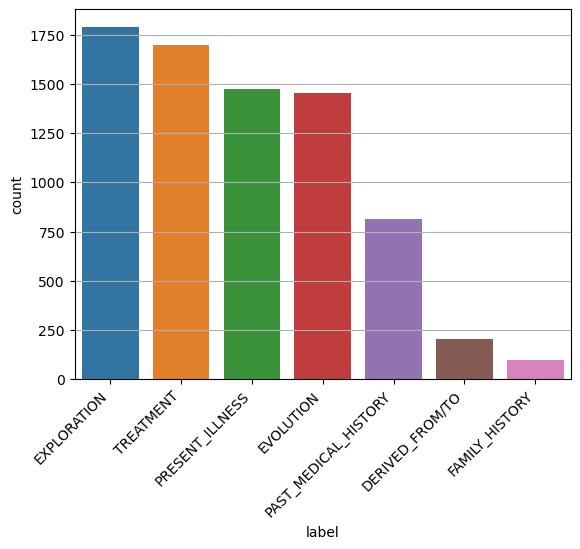

In [20]:
# Representación gráfica

g = sns.countplot(data=df, x="label", order = df["label"].value_counts().index)
g.grid(axis="y")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right");

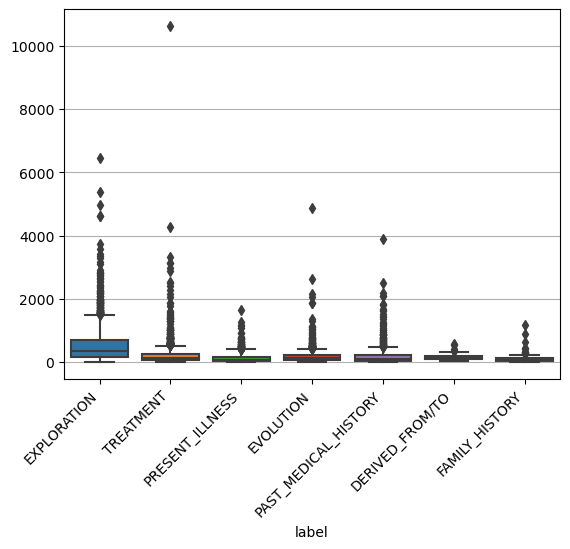

In [21]:
# Longitud del texto por etiqueta

longitud = df["end_offset"] - df["start_offset"]

g = sns.boxplot(data=df, y=longitud, x="label", order = df["label"].value_counts().index)
g.grid(axis="y")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right");

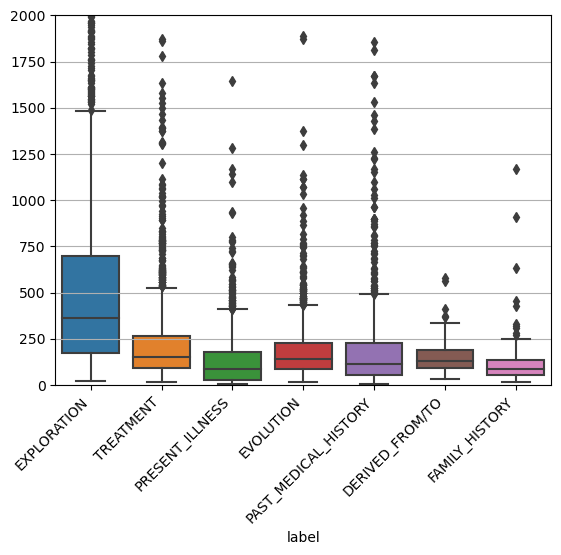

In [22]:
# Longitud del texto por etiqueta limitando eje y

longitud = df["end_offset"] - df["start_offset"]

g = sns.boxplot(data=df, y=longitud, x="label", order = df["label"].value_counts().index)
g.grid(axis="y")
g.set(ylim=(0, 2000))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right");

In [23]:
# Texto más largo
x = df.iloc[[np.argmax(longitud)]]
x

,segment,label,start_offset,end_offset,note_id,lemmatized
5821,Para la elaboración de la prótesis óculo-palpe...,TREATMENT,633,11254,S1138-123X2003000500006-1,elaboración prótesis óculo-palpebral flexible ...


In [24]:
print(x["segment"].values[0])

Para la elaboración de la prótesis óculo-palpebral flexible se debe obtener una impresión que reproduzca fielmente los tejidos remanentes. Para ello se realizó una delimitación de la extensión de la prótesis debido a que sus márgenes deben estar apoyados en superficies estables. La finalidad es obtener un modelo de trabajo y de estudio en yeso piedra o yeso extraduro. Se individualizaron las zonas facial y temporal a impresionar tapando el orificio creado por la perdida del implante con cera «Utility», para que en el momento de la impresión éste no bloquease su retirada. Se aplicó vaselina en las regiones que puedan retener el material de impresión como las cejas o cabello, además también se puede utilizar como material de impresión siliconas fluidas, agár, materiales de poliéter o alginato2,5*,6,8*. En este caso se utilizó alginato, el cual debe ser muy fluido para no deformar los tegumentos y se comienza a colocar en las zonas más profundas del defecto, para evitar la formación de bu

In [25]:
# Longitud
max(longitud)

10621

In [26]:
# Texto más corto 
# Observación: sin información del texto previo es imposible asignar una etiqueta
x = df.iloc[[np.argmin(longitud)]]
x

,segment,label,start_offset,end_offset,note_id,lemmatized
380,sana.,PAST_MEDICAL_HISTORY,18,24,S0034-98872013000500015-2,sano


In [27]:
print(x["segment"].values[0])

sana. 


In [28]:
#Longitud
min(longitud)

6

In [29]:
# Matriz de términos
df_grouped=df[["label","lemmatized"]].groupby(by="label").agg(lambda x:" ".join(x))

# Creating Document Term Matrix
cv=CountVectorizer(analyzer="word")
data=cv.fit_transform(df_grouped["lemmatized"])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index

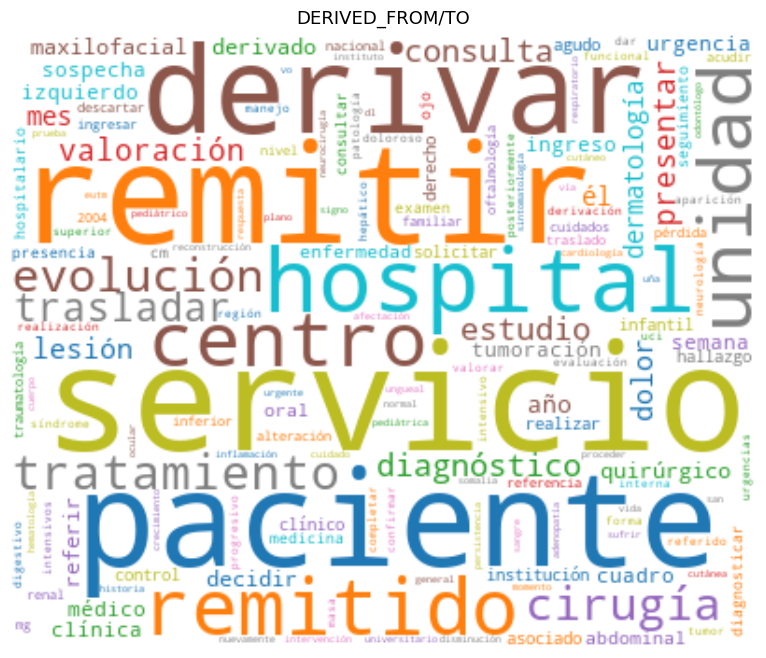

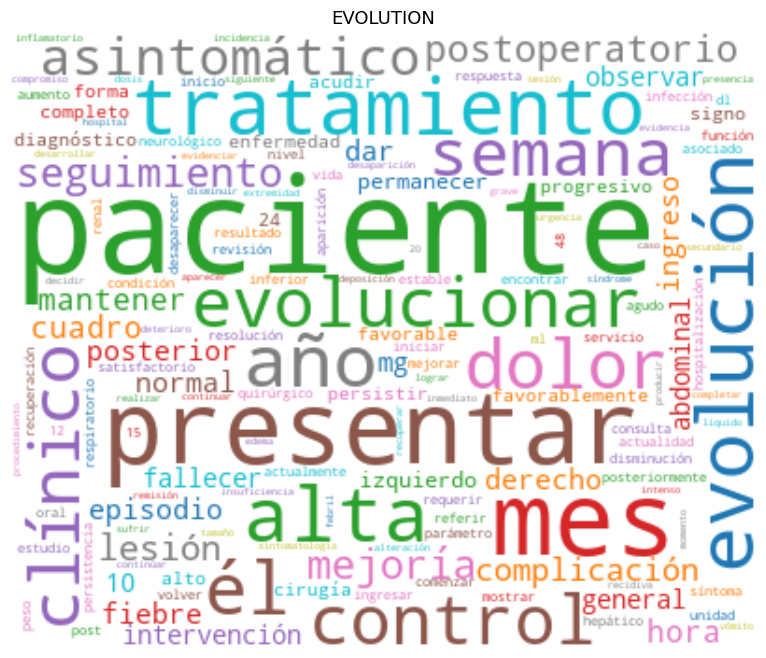

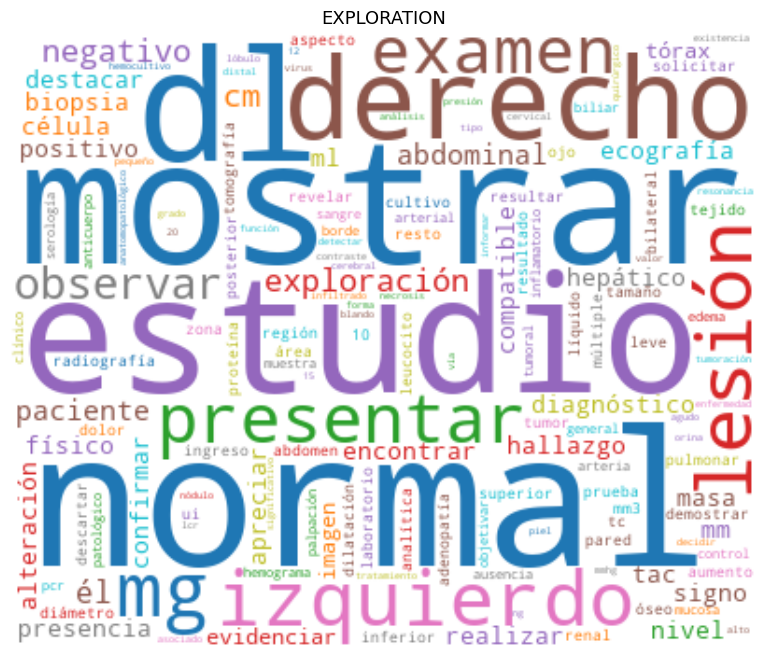

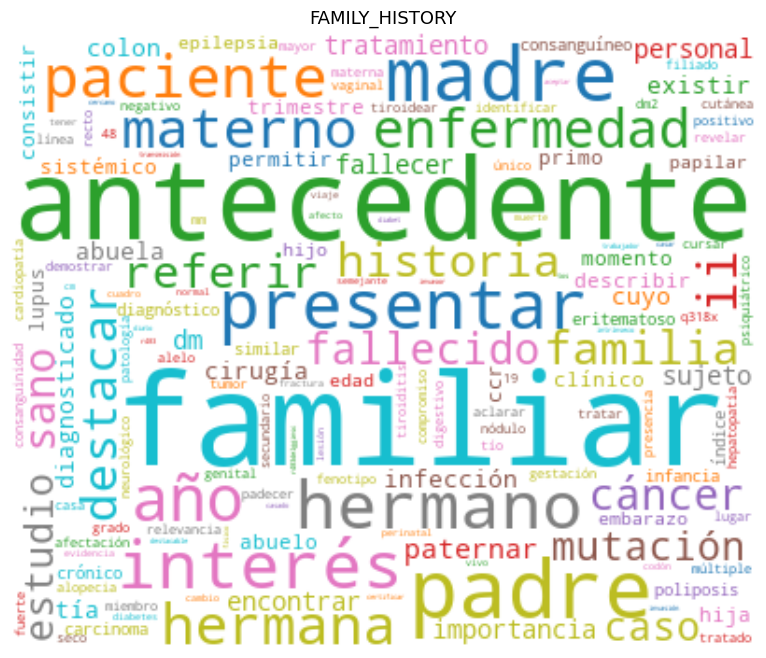

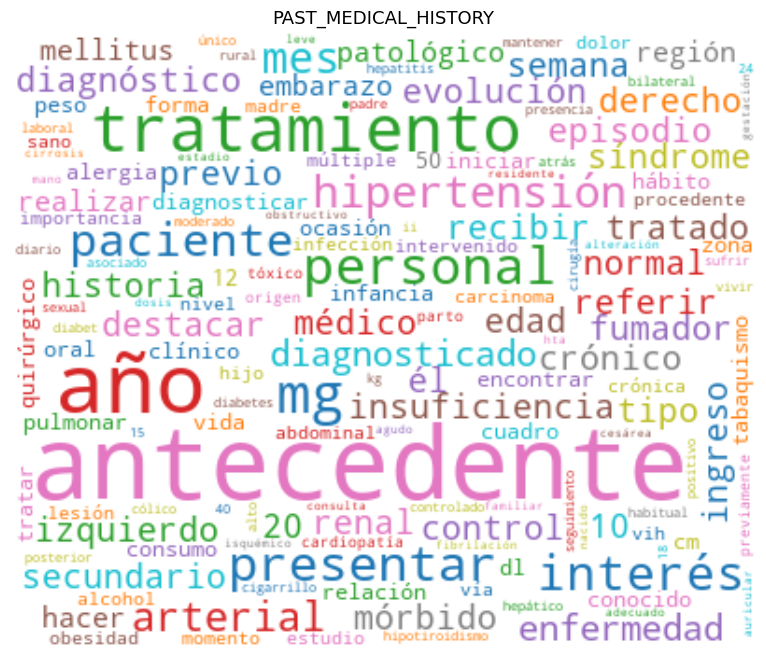

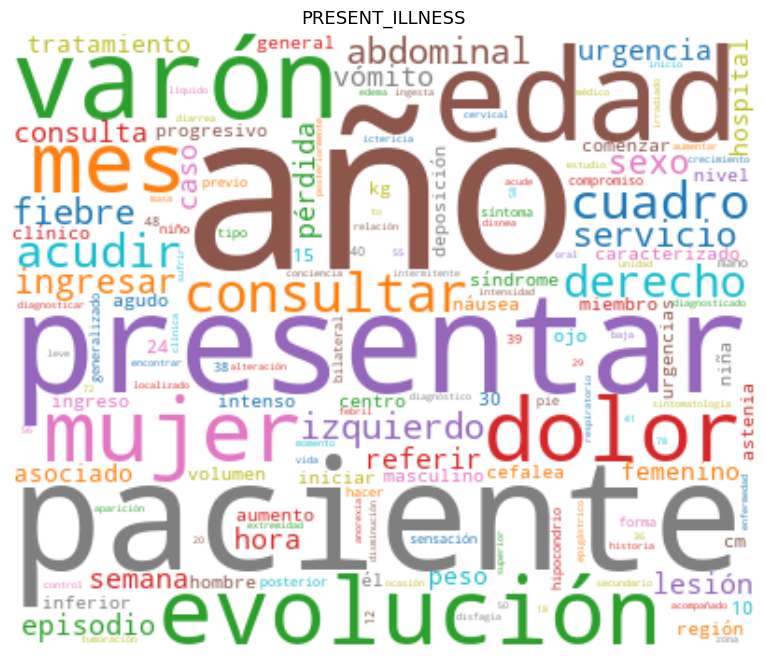

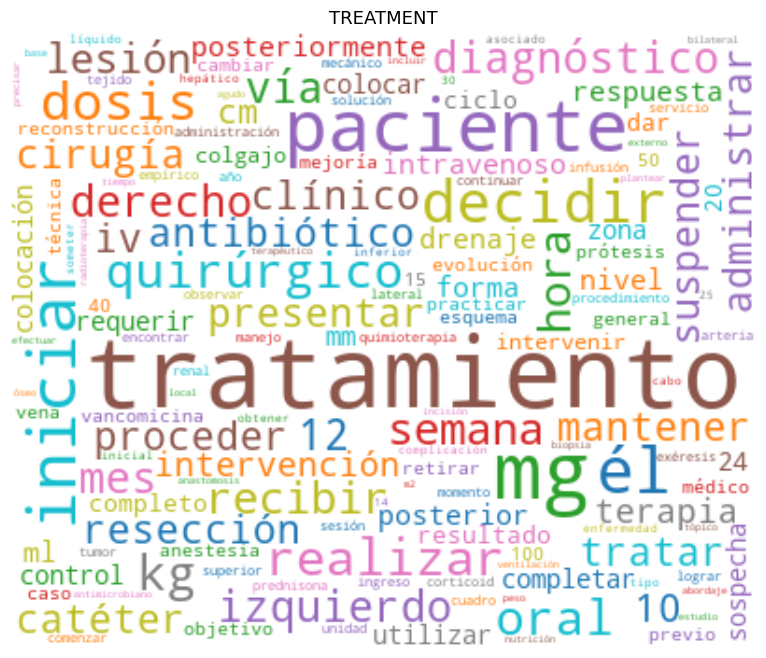

In [30]:
# Palabras más utilizadas por etiqueta

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150, background_color="white", colormap="tab10").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Text(0.5, 0, 'Cantidad de etiquetas por nota')

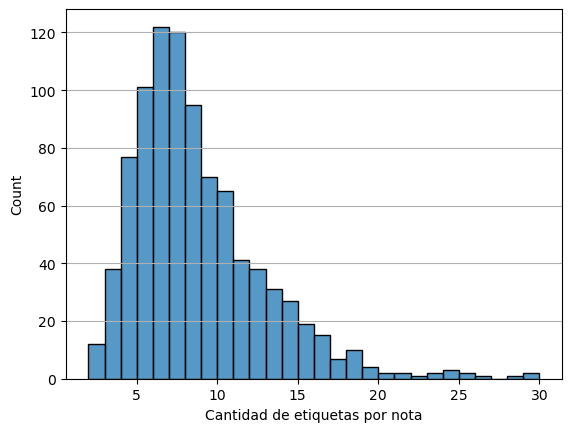

In [31]:
# Cantidad de etiquetas por notas

g = sns.histplot(data=df.groupby(["note_id"])["label"].count())
g.grid(axis="y")
g.set_xlabel("Cantidad de etiquetas por nota")

In [32]:
df["note_id"].value_counts()

S0120-41572015000100003-1    30
S0716-10182010000100014-1    29
S0034-98872007000100014-1    28
S2254-28842016000400013-2    26
S0716-10182014000400016-1    25
                             ..
S0376-78922010000300008-1     2
S1138-123X2004000100007-1     2
S1698-44472004000300013-1     2
S0378-48352005000600008-1     2
S0004-06142006000300010-1     2
Name: note_id, Length: 908, dtype: int64

In [33]:
for index, row in df[df["note_id"]=="S0120-41572015000100003-1"].iterrows():
    print(row["segment"])
    print(row["label"])
    print("\n")

Se presenta el caso de un paciente de 61 años de edad 
PRESENT_ILLNESS


con antecedentes de hipertensión arterial, 
PAST_MEDICAL_HISTORY


que consultó por un cuadro clínico de una semana de evolución con dolor lumbar y cervical posterior, cuya intensidad aumentó hasta dificultar la marcha. El paciente, además, tuvo picos febriles no cuantificados, cefalea retroocular y entró en estado de estupor 24 horas antes de ingresar a urgencias.
 
PRESENT_ILLNESS


En el examen físico de ingreso se registró un soplo sistólico mitral de grado II/IV, rigidez en la nuca y un puntaje de 8/15 en la escala de coma de Glasgow. Se le ordenaron tomografías computadorizadas (TC), una cerebral simple y otra contrastada, con resultados normales. Debido a la sospecha de meningitis se le hizo punción lumbar con análisis citoquímico del líquido cefalorraquídeo, el cual mostró aumento del número de células, hipoglucorraquia e hiperproteinorraquia, así como la presencia de cocos Gram positivos.
 
EXPLORATION




Text(0.5, 0, 'Cantidad de etiquetas únicas por nota')

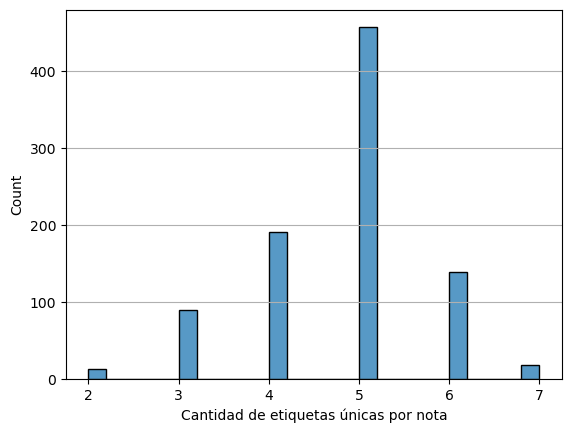

In [34]:
g = sns.histplot(data=df.drop_duplicates(["note_id", "label"]).groupby(["note_id"])["label"].count())
g.grid(axis="y")
g.set_xlabel("Cantidad de etiquetas únicas por nota")

In [35]:
# Etiquetas que van seguidas con mayor frecuencia
consecutive_labels = Counter()
for note_id in df["note_id"].unique():
    labels = df[df["note_id"]==note_id]["label"]
    consecutive_labels.update((zip(labels[:-2], labels[1:])))

Text(0, 0.5, '')

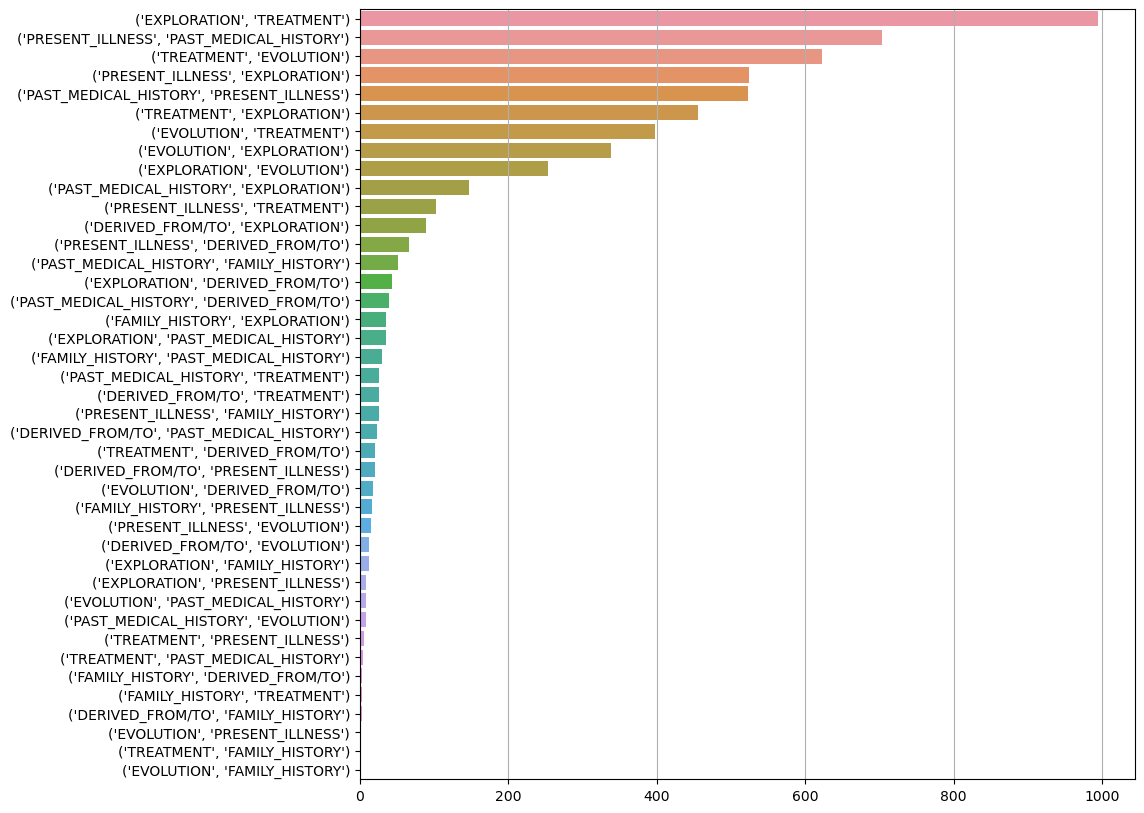

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))

data=pd.DataFrame.from_dict(consecutive_labels, orient='index').reset_index().sort_values(by=0,ascending=False)
g = sns.barplot(x=data[0], y=data["index"])
g.grid(axis="x")
g.set_xlabel("")
g.set_ylabel("")